# Create a CNN model for binary class problems

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img,img_to_array,load_img
#create an image instance of the ImageDataGenerator
train_datagen=ImageDataGenerator(rotation_range=40,
                                 width_shift_range=0.25,
                                 height_shift_range=0.25,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 rescale=1./255,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
#Train data fetching from the directory of images
batch_size=16
train_data=train_datagen.flow_from_directory('C:/Users/2001s/Desktop/cnn/train/',
                                             target_size=(150,150),batch_size=batch_size,class_mode='binary')
 

Found 840 images belonging to 2 classes.


In [3]:
test_data=test_datagen.flow_from_directory('C:/Users/2001s/Desktop/cnn/test/',
                                             target_size=(150,150),batch_size=batch_size,class_mode='binary')


Found 216 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Adjust input_shape for your images
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation


### CNN model for binary class

In [9]:
# Create a CNN model for binary class problems
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [5]:
# Assuming you have train_data and test_data generators
result = model.fit(train_data, 
                   epochs=10, 
                   validation_data=test_data)


Epoch 1/10
53/53 [==============================] - 52s 944ms/step - loss: 0.7277 - accuracy: 0.5179 - val_loss: 0.6932 - val_accuracy: 0.4907
Epoch 2/10
53/53 [==============================] - 39s 735ms/step - loss: 0.6938 - accuracy: 0.5179 - val_loss: 0.7346 - val_accuracy: 0.4954
Epoch 3/10
53/53 [==============================] - 38s 715ms/step - loss: 0.6924 - accuracy: 0.4952 - val_loss: 0.6791 - val_accuracy: 0.5926
Epoch 4/10
53/53 [==============================] - 38s 713ms/step - loss: 0.6895 - accuracy: 0.5286 - val_loss: 0.6917 - val_accuracy: 0.5324
Epoch 5/10
53/53 [==============================] - 38s 714ms/step - loss: 0.6895 - accuracy: 0.5345 - val_loss: 0.6775 - val_accuracy: 0.5972
Epoch 6/10
53/53 [==============================] - 38s 711ms/step - loss: 0.7112 - accuracy: 0.5238 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 7/10
53/53 [==============================] - 38s 709ms/step - loss: 0.6939 - accuracy: 0.5321 - val_loss: 0.6858 - val_accuracy: 0.5741

### Plot for Train & Test Accuracy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


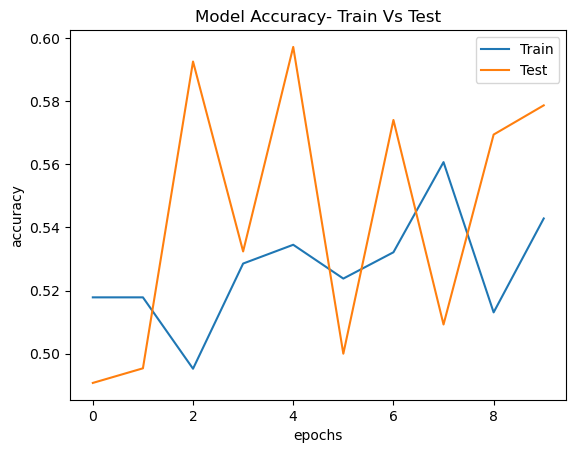

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

### Plot for Train & Test Loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


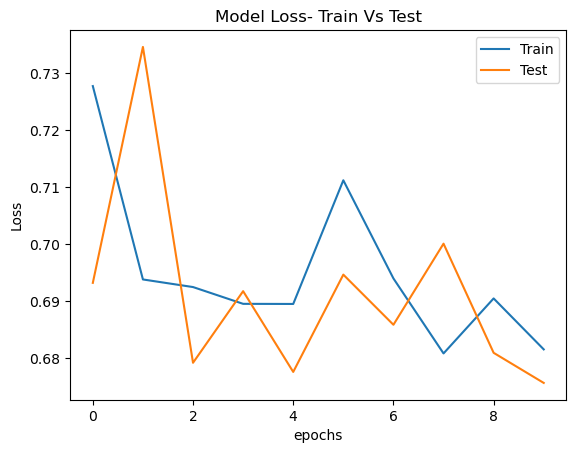

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()

# 

# 

# Build a multiclass classification model using CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [20]:
# Create an instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
# Train data fetching from the directory of images using flow_from_directory
batch_size = 16
train_data = train_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/train/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

test_data = test_datagen.flow_from_directory(
    'C:/Users/2001s/Desktop/cnn-multiclass/test/',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'  # This is where you specify class_mode
)

Found 2464 images belonging to 5 classes.
Found 620 images belonging to 5 classes.


In [22]:
# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Dense (fully connected) layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Assuming you have 5 classes


In [23]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [25]:
# Assuming you have train_data and test_data generators
result = model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
154/154 [==============================] - 129s 827ms/step - loss: 1.5320 - accuracy: 0.3231 - val_loss: 1.3606 - val_accuracy: 0.4403
Epoch 2/5
154/154 [==============================] - 124s 807ms/step - loss: 1.3592 - accuracy: 0.4265 - val_loss: 1.3104 - val_accuracy: 0.4452
Epoch 3/5
154/154 [==============================] - 116s 753ms/step - loss: 1.3046 - accuracy: 0.4598 - val_loss: 1.2313 - val_accuracy: 0.4968
Epoch 4/5
154/154 [==============================] - 116s 754ms/step - loss: 1.2546 - accuracy: 0.4728 - val_loss: 1.2169 - val_accuracy: 0.5000
Epoch 5/5
154/154 [==============================] - 116s 753ms/step - loss: 1.2600 - accuracy: 0.4919 - val_loss: 1.2145 - val_accuracy: 0.5097


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


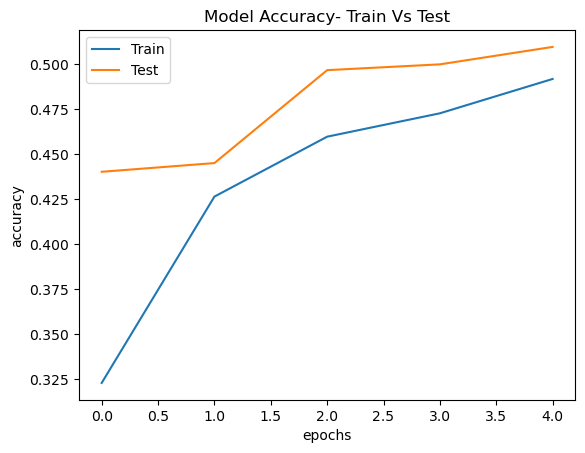

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model Accuracy- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


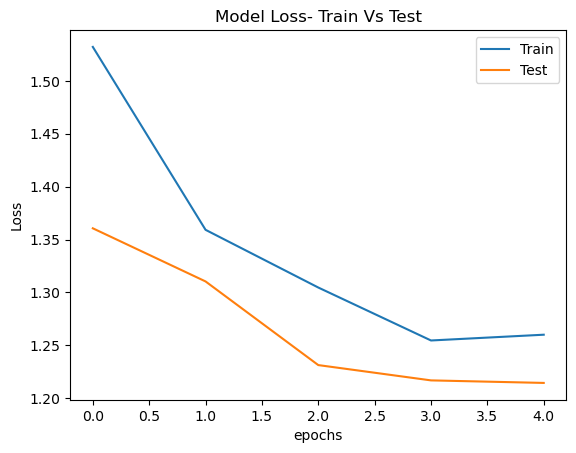

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
print(result.history.keys())
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model Loss- Train Vs Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.show()